<a href="https://colab.research.google.com/github/kumar045/Image_Finder_From_Directory/blob/main/Image_Similarity_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git lfs install && git clone https://huggingface.co/spaces/shivam098/Image-Similarity

Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.
Cloning into 'Image-Similarity'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), 4.70 KiB | 801.00 KiB/s, done.


In [ ]:
!pip3 install -r /content/Image-Similarity/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.8/812.8 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.0/177.0 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58

In [ ]:
!pip uninstall numpy

Found existing installation: numpy 1.24.1
Uninstalling numpy-1.24.1:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.8
    /usr/local/lib/python3.8/dist-packages/numpy-1.24.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.8/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.24.1


In [ ]:
import tensorflow_hub as hub

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
import tensorflow_hub as hub
import numpy as np 

class BigTransfer:

    def __init__(self):
        self.module = hub.KerasLayer("https://tfhub.dev/google/bit/m-r50x1/1")

    def extract_feature(self, imgs):
        features = []
        for img in imgs:
            features.append(np.squeeze(self.module(img)))
        return features

In [ ]:
import tensorflow_hub as hub
import numpy as np 

class ModelnetV3():
    def __init__(self):
        module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5" 
        self.module = hub.load(module_handle)

    def extract_feature(self, imgs):
        print('getting with ModelnetV3...')
        features = []
        for img in imgs:
            features.append(np.squeeze(self.module(img)))
        return features

In [ ]:
from PIL import Image 
import numpy as np
import requests

def load_image_url(path, required_size = (224,224), image_type = 'array'):
    print(f'loading.. {path}, type: {image_type}')
    #  img = Image.open('here it will load from folder instead of internet')
    img = Image.open(path)
    img = Image.fromarray(np.array(img))
    if required_size is not None:
        img = img.resize(required_size)
    if image_type == 'array':
        img = (np.expand_dims(np.array(img), 0)/255).astype(np.float32)
    return img


In [ ]:
from numpy.linalg import norm
import numpy as np

def cosine(x, y):
    return np.dot(x,y)/(norm(x)*norm(y))

In [57]:

from model import simlarity_model as model 

class Similarity:
    def get_models(self):
        return [
            model.SimilarityModel(name= 'Mobilenet V3', image_size= 224, model_cls = ModelnetV3()),
            model.SimilarityModel(name= 'Big Transfer (BiT)', image_size= 224, model_cls = BigTransfer()),
           
            ]        

    def check_similarity(self, img_paths, model):
        imgs = []
        for path in img_paths:
            if path == "": continue
            imgs.append(load_image_url(path, required_size=(model.image_size, model.image_size), image_type=model.image_input_type))
        
        features = model.model_cls.extract_feature(imgs)
        results = []
        for i, v in enumerate(features):
            if i == 0: continue 
            dist = cosine(features[0], v)
            print(f'{i} -- distance: {dist}')
            # results.append((imgs[i], f'similarity: {int(dist*100)}%'))
            original_img = load_image_url(img_paths[i], required_size=None, image_type='pil')
            results.append((original_img, int(dist*100)))

        return results

    

loading.. /content/celebrity/JohnAbraham.jpg, type: array
loading.. /content/celebrity/salman khan.jpg, type: array
loading.. /content/celebrity/JohnAbraham.jpg, type: array
loading.. /content/celebrity/srk.jpg, type: array
getting with ModelnetV3...
1 -- distance: 0.1269003003835678
loading.. /content/celebrity/salman khan.jpg, type: pil
2 -- distance: 1.0
loading.. /content/celebrity/JohnAbraham.jpg, type: pil
3 -- distance: 0.6087173223495483
loading.. /content/celebrity/srk.jpg, type: pil


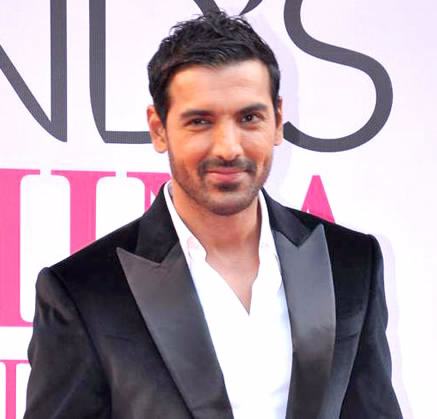

In [74]:
import gradio as gr
import os
import random
import glob

similarity = Similarity()
models = similarity.get_models()
celebrity=[]
def check(): 
    #here we have to loop to get files from the folder and we have to append in the list
    # How can I add new array elements at the beginning of an array in python?
    for img in glob.glob("/content/celebrity/*.jpg"):
      celebrity.append(img)

    test_image="/content/celebrity/JohnAbraham.jpg" 
    celebrity.insert(0,test_image)
    
    result = similarity.check_similarity(celebrity, models[0])
    return result
    
result=check()  
score=[]
for i in result:
  score.append(i[1])

max_index = score.index(max(score))

result[max_index][0] 